## Proyecto: tiendas, productos y ventas

En este proyecto se obtienen tres datasets de productos, tiendas y ventas relacionados entre sí en el cual intentaremos discernir la relación entre estos datasets y los insights valiosos que se puedan obtener a raíz del análisis exploratorio de sus datos. 

El principal objetivo de este análisis será centrarnos en la variación de las unidades vendidas por producto en función del resto de características que lo acompañan. De esta manera podremos predecir mediante Machine Learning qué tipo de productos debería tener una tienda para vender lo máximo posible, su ubicación y cuándo sería la mejor época para vender ese tipo de producto.

In [2]:
# importación de librerías necesarias en el análisis exploratorio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Productos

In [3]:
#carga del dataframe

data_productos = pd.read_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/raw/productos.csv")
data_productos

,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.0,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.0,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.0,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.0,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,NaN,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.0,2022-05-01,discontinued
6,107,Tableta 8 pulgadas,Electrónica,120,95.0,2023-03-10,active
7,108,Smartphone Gama Media,Electrónica,250,180.0,2023-03-15,active
8,109,Smartphone Gama Alta,Electrónica,500,380.0,2023-03-20,active
9,110,Laptop Básica,Electrónica,450,350.0,2023-01-05,paused


In [4]:
#filas y columnas del dataframe

data_productos.shape

(21, 7)

In [5]:
#infografía del dataframe

data_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    21 non-null     int64  
 1   product_name  21 non-null     object 
 2   category      21 non-null     object 
 3   price         21 non-null     int64  
 4   cost          20 non-null     float64
 5   launch_date   21 non-null     object 
 6   status        21 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ KB


In [6]:
#identificar celdas vacías o nulas
vacias = data_productos.applymap(lambda x: pd.isna(x) or x == " ")

#filtrar filas donde alguna columna tenga valores vacíos o nulos
na_o_vacias = data_productos[vacias.any(axis=1)]

na_o_vacias

/tmp/ipykernel_162655/1896814862.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacias = data_productos.applymap(lambda x: pd.isna(x) or x == " ")


,product_id,product_name,category,price,cost,launch_date,status
4,105,Batidora Compacta,Electrodomesticos,80,NaN,2023-02-01,active


Un único valor nulo en la variable "cost". Se trata del producto "batidora compacta". Debido a la necesidad de conservar la mayor cantidad de datos posibles se imputará ese valor nulo por la media de todos los productos pertenecientes a su misma categoría.

In [7]:
filas_electrodomésticos = data_productos.loc[data_productos["category"] == "Electrodomesticos"] #filtrado de productos con categoría de electrodomésicos

media_cost_productos =filas_electrodomésticos["cost"].mean().round(2) # media del coste de los electrodomésticos
media_cost_productos

72.78

In [8]:
data_productos["cost"].fillna(media_cost_productos, inplace=True) #imputación de la media por el valor nulo
data_productos

/tmp/ipykernel_162655/356210553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_productos["cost"].fillna(media_cost_productos, inplace=True) #imputación de la media por el valor nulo


,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.00,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.00,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.00,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.00,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,72.78,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.00,2022-05-01,discontinued
6,107,Tableta 8 pulgadas,Electrónica,120,95.00,2023-03-10,active
7,108,Smartphone Gama Media,Electrónica,250,180.00,2023-03-15,active
8,109,Smartphone Gama Alta,Electrónica,500,380.00,2023-03-20,active
9,110,Laptop Básica,Electrónica,450,350.00,2023-01-05,paused


In [9]:
#se eliminan duplicados

data_productos = data_productos.drop_duplicates()
data_productos

,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.00,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.00,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.00,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.00,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,72.78,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.00,2022-05-01,discontinued
6,107,Tableta 8 pulgadas,Electrónica,120,95.00,2023-03-10,active
7,108,Smartphone Gama Media,Electrónica,250,180.00,2023-03-15,active
8,109,Smartphone Gama Alta,Electrónica,500,380.00,2023-03-20,active
9,110,Laptop Básica,Electrónica,450,350.00,2023-01-05,paused


Dataset limpio

# Tiendas

In [10]:
#carga del dataframe

data_tiendas = pd.read_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/raw/tiendas.csv")
data_tiendas

,store_id,store_name,location,manager,opening_date
0,501,Tienda Centro,Madrid,Juan Perez,2022-01-10
1,502,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
2,503,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01
3,504,Tienda Este,Valencia,Ana Gomez,2022-04-15
4,505,Tienda Oeste,Bilbao,Pedro Hernandez,2022-05-01
5,506,Tienda Duplicada,Madrid,Julian Casas,2022-05-20
6,507,Tienda Móvil,Itinerante,Maria Diaz,2022-06-10
7,508,Pop-up Store,Barcelona,-,2023-01-01
8,509,Tienda Online,Online,Virtual Manager,2022-07-01
9,509,Tienda Online Duplicada,Online,Virtual Manager,2022-07-01


In [11]:
data_tiendas.shape #filas y columnas del dataframe 

(10, 5)

In [12]:
#infografía del dataset

data_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      10 non-null     int64 
 1   store_name    10 non-null     object
 2   location      10 non-null     object
 3   manager       10 non-null     object
 4   opening_date  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [13]:
#identificar celdas vacías o nulas
vacias = data_tiendas.applymap(lambda x: pd.isna(x) or x == " ")

#filtrar filas donde alguna columna tenga valores vacíos o nulos
na_o_vacias = data_tiendas[vacias.any(axis=1)]

na_o_vacias

/tmp/ipykernel_162655/2693268195.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacias = data_tiendas.applymap(lambda x: pd.isna(x) or x == " ")


,store_id,store_name,location,manager,opening_date


In [14]:
data_tiendas.drop_duplicates()
data_tiendas.shape

(10, 5)

Sin datos nulos ni duplicados, dataset limpio.

# Ventas

In [15]:
#carga del dataframe

data_ventas = pd.read_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/raw/ventas.csv")
data_ventas

,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost
0,10001,2023-01-02,501,101,5,450,300
1,10002,2023-01-03,501,102,3,180,120
2,10003,2023-01-03,501,105,1,80,NaN
3,10004,2023-01-15,502,103,2,60,40
4,10005,2023-02-10,502,104,1,50,30
5,10006,2023-02-11,502,106,1,300,200
6,10007,2023-02-15,503,107,2,240,190
7,10008,2023-02-16,503,108,1,250,180
8,10009,2023-02-20,504,109,1,500,380
9,10010,2023-03-01,501,110,2,900,700


In [16]:
#filas y columnas del dataframe
data_ventas.shape

(33, 7)

In [17]:
#infografia
data_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sale_id        33 non-null     int64 
 1   date           33 non-null     object
 2   store_id       33 non-null     int64 
 3   product_id     33 non-null     int64 
 4   units_sold     33 non-null     int64 
 5   total_revenue  33 non-null     int64 
 6   total_cost     32 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


In [18]:
#identificar celdas vacías o nulas
vacias = data_ventas.applymap(lambda x: pd.isna(x) or x == " ")

#filtrar filas donde alguna columna tenga valores vacíos o nulos
na_o_vacias = data_ventas[vacias.any(axis=1)]

na_o_vacias

/tmp/ipykernel_162655/1505785736.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacias = data_ventas.applymap(lambda x: pd.isna(x) or x == " ")


,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost
2,10003,2023-01-03,501,105,1,80,NaN
10,10011,2023-03-05,506,105,2,160,
11,10012,2023-03-05,506,117,5,200,


Se observa que los datos nulos/faltantes corresponden al producto con valor nulo tratado en el dataset "data_productos" y a la fila duplicada del mismo dataset, que por motivos de extracción errónea se han rellenado con valor faltante.

Estos valores se imputarán por el producto del coste y la cantidad de unidades vendidas totales.

In [19]:
#búsqueda del coste del valor faltante mediante el "product id"

producto_valor_faltante = data_productos[data_productos["product_id"] == 117]
coste_producto_valor_faltante  = producto_valor_faltante["cost"]
coste_producto_valor_faltante

16    25.0
Name: cost, dtype: float64

In [20]:
#imputación de valores nulos/faltantes

data_ventas.loc[data_ventas["sale_id"] == 10012, "total_cost"] = 25
data_ventas.loc[data_ventas["sale_id"] == 10003, "total_cost"] = media_cost_productos 
data_ventas.loc[data_ventas["sale_id"] == 10011, "total_cost"] = media_cost_productos * 2

data_ventas


,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost
0,10001,2023-01-02,501,101,5,450,300
1,10002,2023-01-03,501,102,3,180,120
2,10003,2023-01-03,501,105,1,80,72.78
3,10004,2023-01-15,502,103,2,60,40
4,10005,2023-02-10,502,104,1,50,30
5,10006,2023-02-11,502,106,1,300,200
6,10007,2023-02-15,503,107,2,240,190
7,10008,2023-02-16,503,108,1,250,180
8,10009,2023-02-20,504,109,1,500,380
9,10010,2023-03-01,501,110,2,900,700


In [21]:
data_ventas.drop_duplicates()
data_ventas.shape

(33, 7)

Dataset limpio.

## Construcción del dataset final

In [22]:
#conectamos el dataframe "tiendas" con el dataframe "ventas" mediante un merging gracias a la columna en común "store_id"
 
dataset_tiendas_ventas = pd.merge(data_ventas, data_tiendas, on= "store_id")
dataset_tiendas_ventas

,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost,store_name,location,manager,opening_date
0,10001,2023-01-02,501,101,5,450,300,Tienda Centro,Madrid,Juan Perez,2022-01-10
1,10002,2023-01-03,501,102,3,180,120,Tienda Centro,Madrid,Juan Perez,2022-01-10
2,10003,2023-01-03,501,105,1,80,72.78,Tienda Centro,Madrid,Juan Perez,2022-01-10
3,10004,2023-01-15,502,103,2,60,40,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
4,10005,2023-02-10,502,104,1,50,30,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
5,10006,2023-02-11,502,106,1,300,200,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
6,10007,2023-02-15,503,107,2,240,190,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01
7,10008,2023-02-16,503,108,1,250,180,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01
8,10009,2023-02-20,504,109,1,500,380,Tienda Este,Valencia,Ana Gomez,2022-04-15
9,10010,2023-03-01,501,110,2,900,700,Tienda Centro,Madrid,Juan Perez,2022-01-10


In [23]:
#conectamos de nuevo el dataframe "dataset_tiendas_ventas" con el dataframe "data_productos" gracias a su columna en común "product_id"

dataset_tiendas_ventas_productos = pd.merge(dataset_tiendas_ventas, data_productos, on= "product_id")
dataset_tiendas_ventas_productos

,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost,store_name,location,manager,opening_date,product_name,category,price,cost,launch_date,status
0,10001,2023-01-02,501,101,5,450,300,Tienda Centro,Madrid,Juan Perez,2022-01-10,Cafetera Premium,Electrodomesticos,90,60.00,2023-01-01,active
1,10002,2023-01-03,501,102,3,180,120,Tienda Centro,Madrid,Juan Perez,2022-01-10,Cafetera Básica,Electrodomesticos,60,40.00,2023-01-15,active
2,10003,2023-01-03,501,105,1,80,72.78,Tienda Centro,Madrid,Juan Perez,2022-01-10,Batidora Compacta,Electrodomesticos,80,72.78,2023-02-01,active
3,10004,2023-01-15,502,103,2,60,40,Tienda Norte,Barcelona,Laura Lopez,2022-02-05,Tostadora 2 rebanadas,Electrodomesticos,30,20.00,2022-11-01,active
4,10005,2023-02-10,502,104,1,50,30,Tienda Norte,Barcelona,Laura Lopez,2022-02-05,Tostadora 4 rebanadas,Electrodomesticos,50,30.00,2022-12-01,paused
5,10006,2023-02-11,502,106,1,300,200,Tienda Norte,Barcelona,Laura Lopez,2022-02-05,Lavadora 7kg,Electrodomesticos,300,200.00,2022-05-01,discontinued
6,10007,2023-02-15,503,107,2,240,190,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01,Tableta 8 pulgadas,Electrónica,120,95.00,2023-03-10,active
7,10008,2023-02-16,503,108,1,250,180,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01,Smartphone Gama Media,Electrónica,250,180.00,2023-03-15,active
8,10009,2023-02-20,504,109,1,500,380,Tienda Este,Valencia,Ana Gomez,2022-04-15,Smartphone Gama Alta,Electrónica,500,380.00,2023-03-20,active
9,10010,2023-03-01,501,110,2,900,700,Tienda Centro,Madrid,Juan Perez,2022-01-10,Laptop Básica,Electrónica,450,350.00,2023-01-05,paused


In [24]:
#tamaño dataset final

dataset_tiendas_ventas_productos.shape

(32, 17)

In [25]:
#info dataset final

dataset_tiendas_ventas_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_id        32 non-null     int64  
 1   date           32 non-null     object 
 2   store_id       32 non-null     int64  
 3   product_id     32 non-null     int64  
 4   units_sold     32 non-null     int64  
 5   total_revenue  32 non-null     int64  
 6   total_cost     32 non-null     object 
 7   store_name     32 non-null     object 
 8   location       32 non-null     object 
 9   manager        32 non-null     object 
 10  opening_date   32 non-null     object 
 11  product_name   32 non-null     object 
 12  category       32 non-null     object 
 13  price          32 non-null     int64  
 14  cost           32 non-null     float64
 15  launch_date    32 non-null     object 
 16  status         32 non-null     object 
dtypes: float64(1), int64(6), object(10)
memory usage: 4.4+ K

Se han eliminado filas ya que el "product_id = 999" no aparece en el dataframe "data_productos". Se prescindirá de ese producto ya que no tenemos datos relevantes como su categoría o el nombre del mismo como para poder incluirlo en el estudio. 

Se observa también que el producto "Laptop Profesional" no aparece en el dataframe final, ya que ninguna unidad ha sido vendida. Los motivos pueden variar bien por ser un producto especializado y no haber encontrado el cliente correcto o por ser un producto caro.

Además en el dataframe "data_ventas" se observa un "store_id" con un valor "999". Debido a que no hay ninguna equivalencia en el dataframe "data_tiendas", tampoco aparece en este dataframe final.

Por último se convertirá la variable "total_cost" a int64 debido a la naturaleza de sus datos para poder tratar a la variable como numérica.

In [26]:
#conversión de variable categórica a numérica

dataset_tiendas_ventas_productos["total_cost"] = pd.to_numeric(dataset_tiendas_ventas_productos["total_cost"])

In [27]:
#nuevo nombre del dataset final

dataset = dataset_tiendas_ventas_productos.copy()

In [28]:
#renombramos la fecha de venta del producto por una más descriptiva

dataset.rename(columns = {"date": "sale_date"}, inplace=True)

In [29]:
#columnas que se eliminan por no aportar valor al análisis

dataset.drop(columns= ['sale_id', 'store_id', 'product_id', 'manager', 'status'], inplace=True)

Las "variables_id" aunque importantes dentro de los comercios para su organización carecen de valor instrocpectivo.

Así mismo el "manager" pueden afectar en cuanto a la profesionalidad de la persona o la tienda y podrían influir en si la venta se lleva a cabo o no, pero prefiero incluir en el análisis valores más absolutos y no tan relativos.

El "status" simplemente refleja el estado de oportunidad de compra o no, pero el objetivo es predecir el número de productos que pueden llegar a venderse sin tener en cuenta si está disponible o no, por lo que se asumirá su disponibilidad siempre.



In [30]:
#reorganización personal de columnas

dataset = dataset [['product_name', 'category', 'price', 'cost', 'units_sold', 'total_revenue', 
                            'total_cost', 'launch_date', 'sale_date', 'store_name', 'location', 'opening_date']]

In [31]:
dataset.describe()

,price,cost,units_sold,total_revenue,total_cost
count,32.000000,32.000000,32.000000,32.00000,32.000000
mean,153.125000,112.705000,2.593750,295.78125,213.010625
std,180.379305,136.805668,1.864081,307.93304,237.110550
min,15.000000,10.000000,1.000000,35.00000,25.000000
25%,40.000000,25.000000,1.000000,78.75000,54.000000
50%,80.000000,60.000000,2.000000,190.00000,130.000000
75%,250.000000,180.000000,3.000000,412.50000,300.000000
max,800.000000,600.000000,10.000000,1350.00000,1050.000000


Dentro de las columnas con datos numéricos se observan que los valores máximos llegan a pasar el triple del valor presente en el 75% de los datos (Q3), lo que podría indicar la presencia de outliers.

In [32]:
#guardado del dataset

dataset.to_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/processed/processed_data.csv", index=False)

In [33]:
#valores únicos por columna

for column in dataset:
    print(dataset[column].unique())


['Cafetera Premium' 'Cafetera Básica' 'Batidora Compacta'
 'Tostadora 2 rebanadas' 'Tostadora 4 rebanadas' 'Lavadora 7kg'
 'Tableta 8 pulgadas' 'Smartphone Gama Media' 'Smartphone Gama Alta'
 'Laptop Básica' 'Pack Cuchillos x3' 'Plancha de Ropa' 'Termo 1L'
 'Termo 500ml' 'Aspiradora Robot' 'Ventilador de Pie' 'Cámara Réflex'
 'Cámara Deportiva' 'Parrilla Eléctrica']
['Electrodomesticos' 'Electrónica' 'Hogar']
[ 90  60  80  30  50 300 120 250 500 450  40  45  25  15  35 800 200 100]
[ 60.    40.    72.78  20.    30.   200.    95.   180.   380.   350.
  25.    18.    10.   600.   150.    70.  ]
[ 5  3  1  2 10  4]
[ 450  180   80   60   50  300  240  250  500  900  160  200  850   90
   75   40   35  800  400 1350  135  105  360]
[ 300.    120.     72.78   40.     30.    200.    190.    180.    380.
  700.    145.56   25.    600.     60.     54.     50.   1050.    360.
   90.    140.     75.    240.  ]
['2023-01-01' '2023-01-15' '2023-02-01' '2022-11-01' '2022-12-01'
 '2022-05-01' '2023-

## <u>Análisis exploratorio</u>

- Análisis de variables:

'product_name': descripción del producto.
 
'category': categoría a la que pertenece el producto en concreto: 'Electrodomesticos', 'Electrónica' y 'Hogar'.

'price': precio de venta del producto.

'cost': coste de fabricación/venta del producto.

'units_sold': unidades totales vendidas del producto.

'total_revenue': beneficio total de la venta del producto teniendo en cuenta la cantidad vendida.

'total_cost': coste total del producto teniendo en cuenta la cantidad vendida.

'launch_date': fecha de puesta a la venta del producto.

'sale_date': fecha de la venta del producto.

'store_name': nombre de la tienda en la que se vendió el producto.

'location': localización de la tienda donde se vendió el producto: 'Madrid', 'Barcelona', 'Sevilla', 'Valencia', 'Itinerante', 'Bilbao' y 'Online'.

'opening_date': fecha de apertura de la tienda donde se vendió el producto.



## Análisis univariante (categórico)

- variables categóricas: 'product_name', 'category', 'store_name', 'location'.

/tmp/ipykernel_162655/2892009612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[0, 0], x=top_10_productos.index, y=top_10_productos.values, palette="Blues_d")
/tmp/ipykernel_162655/2892009612.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[1, 0], x=top_10_tiendas.index, y=top_10_tiendas.values, palette="Greens_d")


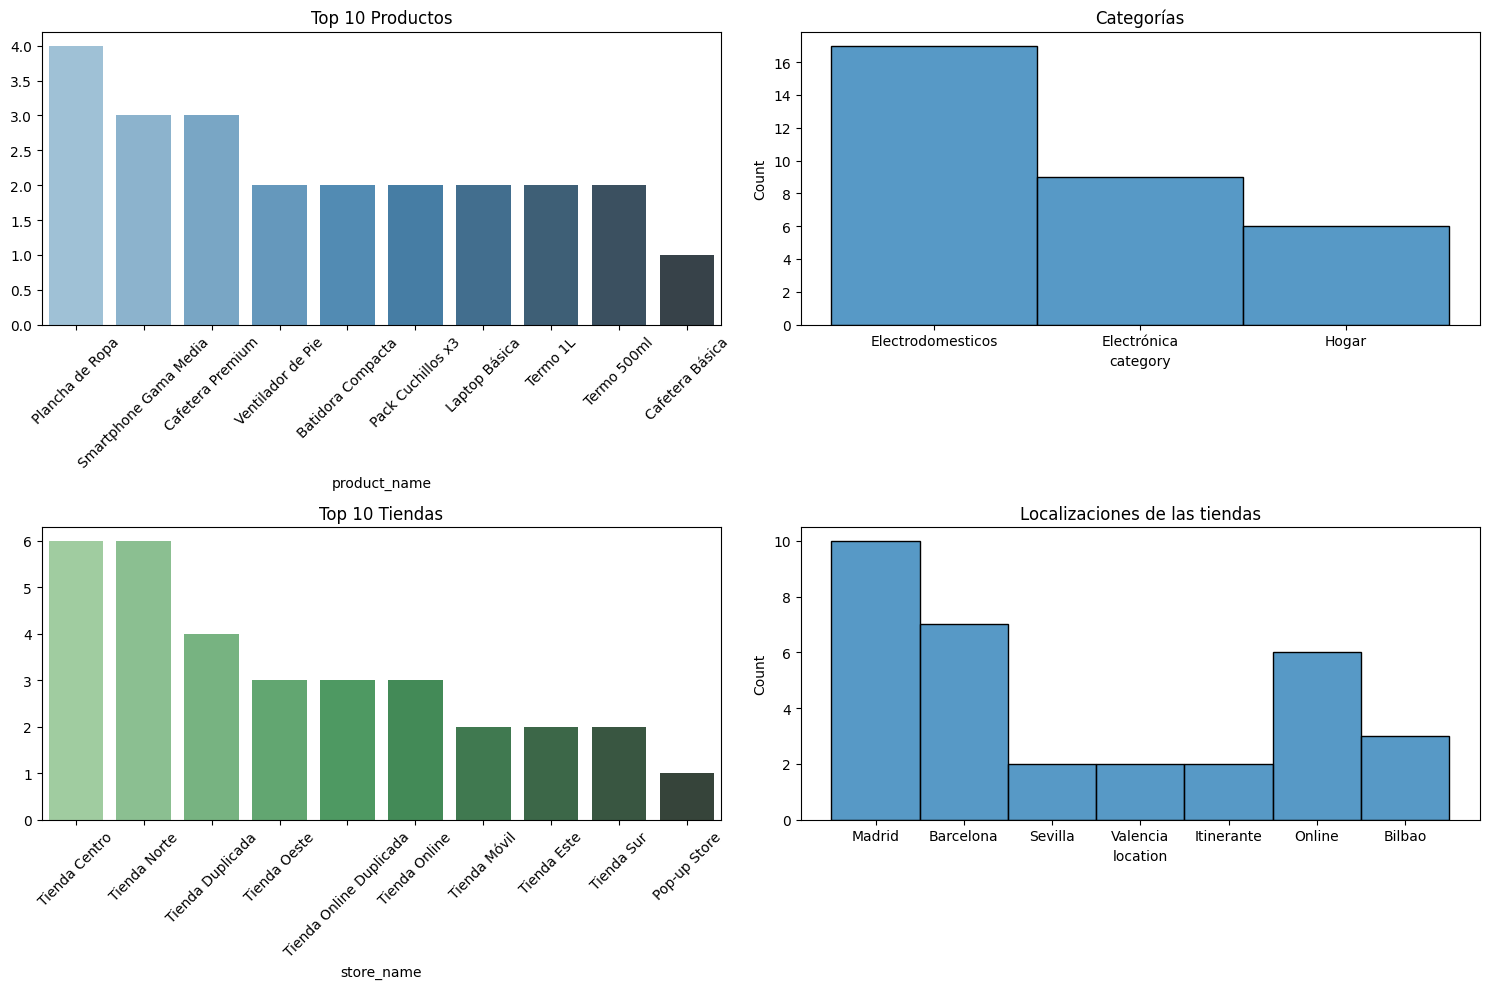

In [34]:
#agrupar y contar las categorías más frecuentes ya que hay demasiados datos de esta columna para proyectarlos en un solo gráfico
top_10_productos = dataset['product_name'].value_counts().nlargest(10)  #top 10 productos
top_10_tiendas = dataset['store_name'].value_counts().nlargest(10)  #top 10 tiendas

#crear una figura y ejes
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

#histograma para los 10 productos más vendidos
sns.barplot(ax=axis[0, 0], x=top_10_productos.index, y=top_10_productos.values, palette="Blues_d")
axis[0, 0].set_title('Top 10 Productos')
axis[0, 0].tick_params(axis='x', rotation=45)

#histograma para las 10 tiendas más frecuentes
sns.barplot(ax=axis[1, 0], x=top_10_tiendas.index, y=top_10_tiendas.values, palette="Greens_d")
axis[1, 0].set_title('Top 10 Tiendas')
axis[1, 0].tick_params(axis='x', rotation=45)

#histograma para 'category' y 'location' 
sns.histplot(ax=axis[0, 1], data=dataset, x="category").set_title('Categorías')
sns.histplot(ax=axis[1, 1], data=dataset, x="location").set_title('Localizaciones de las tiendas')

#ajustar el layout
plt.tight_layout()

#mostrar el plot
plt.show()

Productos: curiosamente el producto con mayor presencia en las diferentes tiendas es la plancha de ropa, por delante del smartphone de gama media.

Categorías: el tipo de producto que más se encuentra en las tiendas es el perteneciente a los electrodomésticos.

Tiendas: la Tienda Centro y la Tienda Norte lideran, teniendo cada uno 6 productos que han conseguido ventas.

Localizaciones: Madrid lidera en cuanto a cantidad en número de tiendas. No obstante los resultados obtenidos están sesgados por la cantidad de ventas y no por el número total de tiendas. Las diferentes localidades cuentan con el siguiente número de tiendas:

Madrid, dos tiendas; Tienda Centro y Tienda Duplicada.

Barcelona, dos tiendas; Tienda Norte	y Pop-up Store.

Sevilla, una tienda; Tienda Sur.

Valencia, una tienda; Tienda Este.

Bilbao, una tienda; Tienda Oeste.

Un total de dos tiendas tiene un formato online; Tienda Online y Tienda Online Duplicada.

## Análisis univariante (numérico)

- variables numéricas: 'price', 'cost', 'units_sold', 'total_revenue', 'total_cost'

##  - price

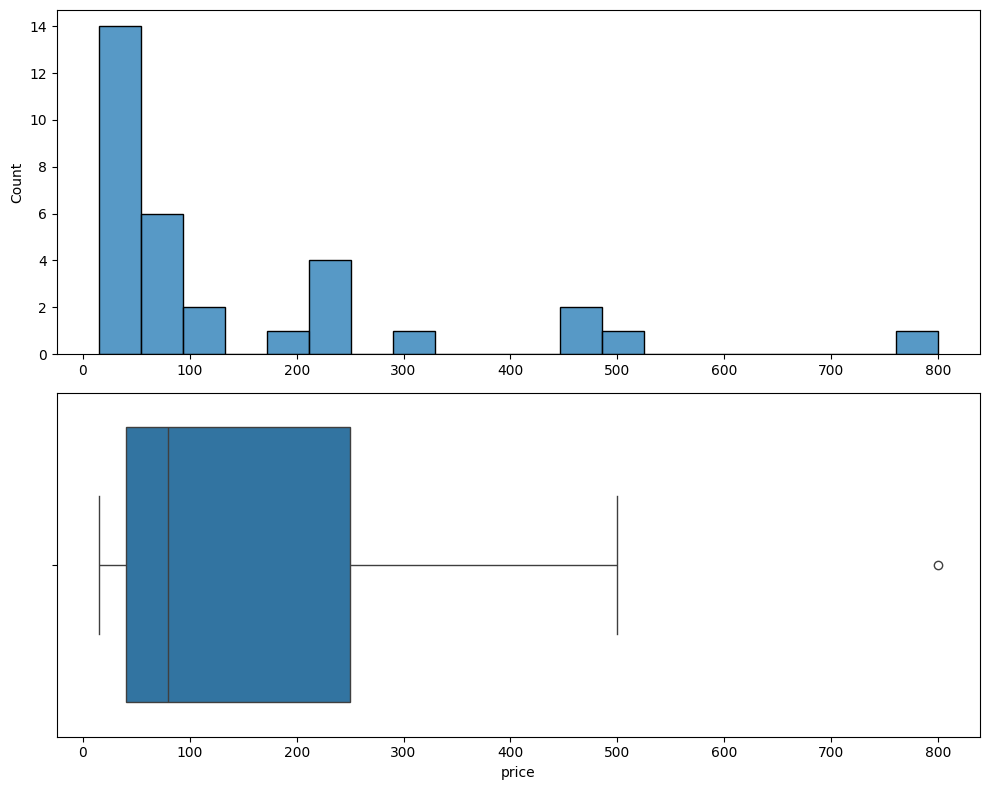

In [35]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

#histograma y boxplot para 'price'
sns.histplot(ax=axis[0], data=dataset, x="price", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="price")

plt.tight_layout()


Se observa una concentración mayoritaría de los precios de los productos por debajo de los 100 €, muy posiblemente debido a que la mayoría de los productos son de la categoría "electrodomésticos" y "hogar". Un único outlier se encuentra cerca de los 800 €.

<Axes: xlabel='cost'>

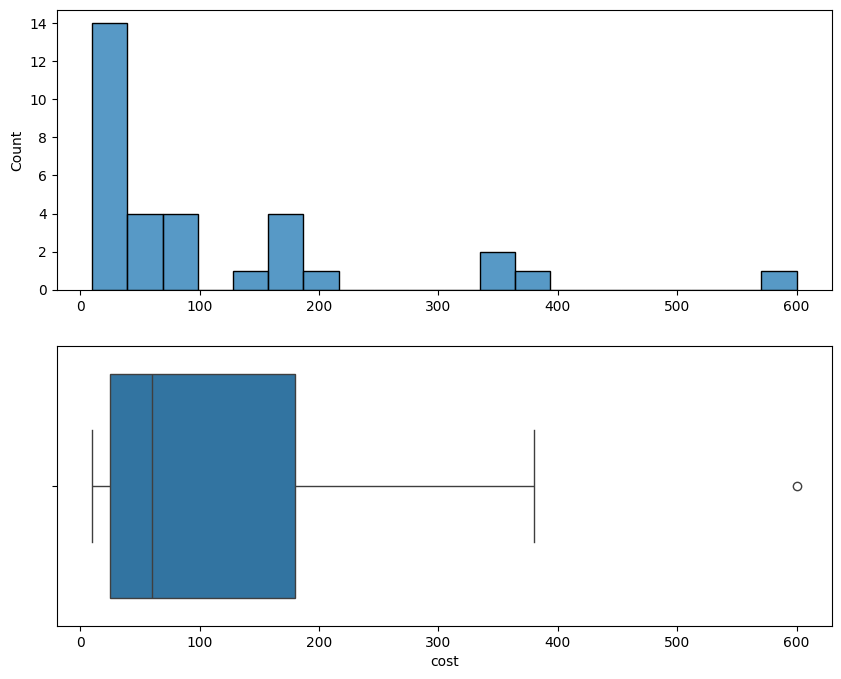

In [36]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

#histograma y boxplot para 'cost'
sns.histplot(ax=axis[0], data=dataset, x="cost", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="cost")

De la misma manera en que influencían la mayor presencia de electrodomésticos y productos del hogar en los datos de "price", así mismo ocurre en "cost". Los costes de venta o producción deben mantenerse siempre más bajos, obviamente, que el precio de venta para asegurar un margen de beneficio. Aparentemente uno de los productos tiene un coste de 600 €.

<Axes: xlabel='units_sold'>

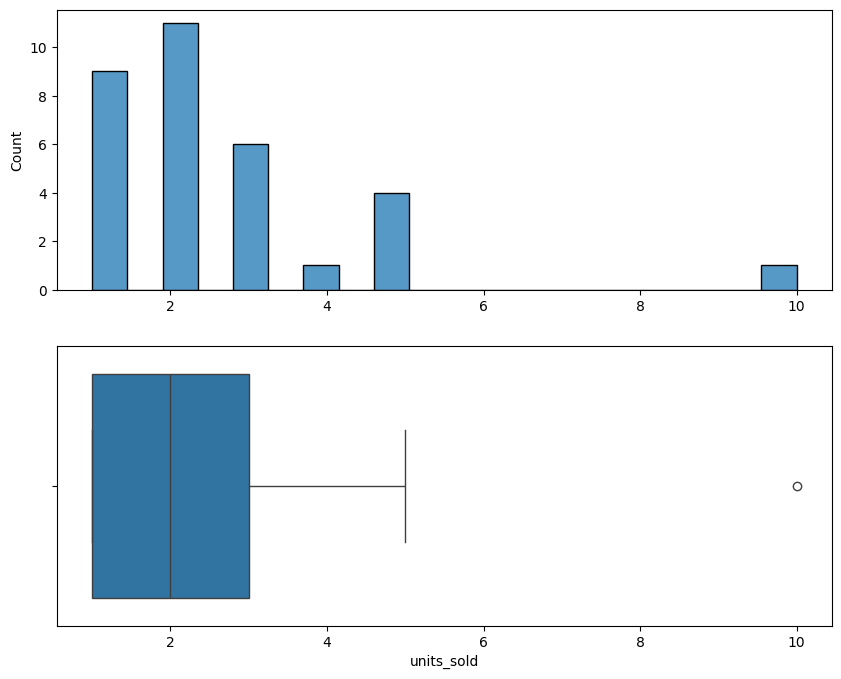

In [ ]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

#histograma y boxplot para 'units_sold'
sns.histplot(ax=axis[0], data=dataset, x="units_sold", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="units_sold")

La mayoría de los productos no superan las 5 ventas, habiendo un único producto que ha conseguido venderse 10 veces.

<Axes: xlabel='total_revenue'>

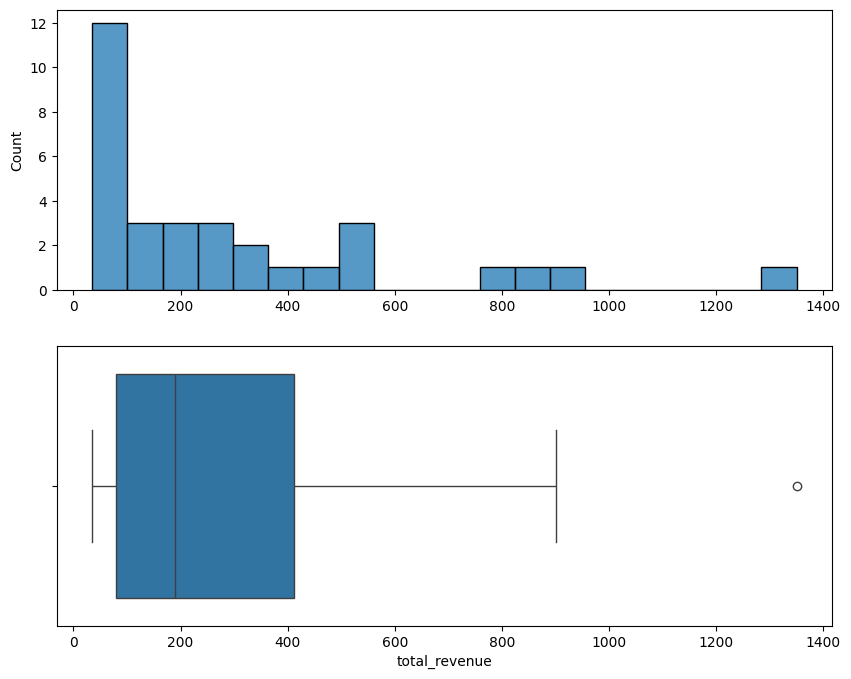

In [38]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

#histograma y boxplot para 'total_revenue'
sns.histplot(ax=axis[0], data=dataset, x="total_revenue", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="total_revenue")

Se observa que la mayoría de las ventas consiguieron un beneficio total por debajo de los 100 euros, estando la media cerca de los 200. Esto podría significar que o bien hay productos baratos que se han vendido mucho o que hay productos más caros que no han tenido tanto éxito de venta.

<Axes: xlabel='total_cost'>

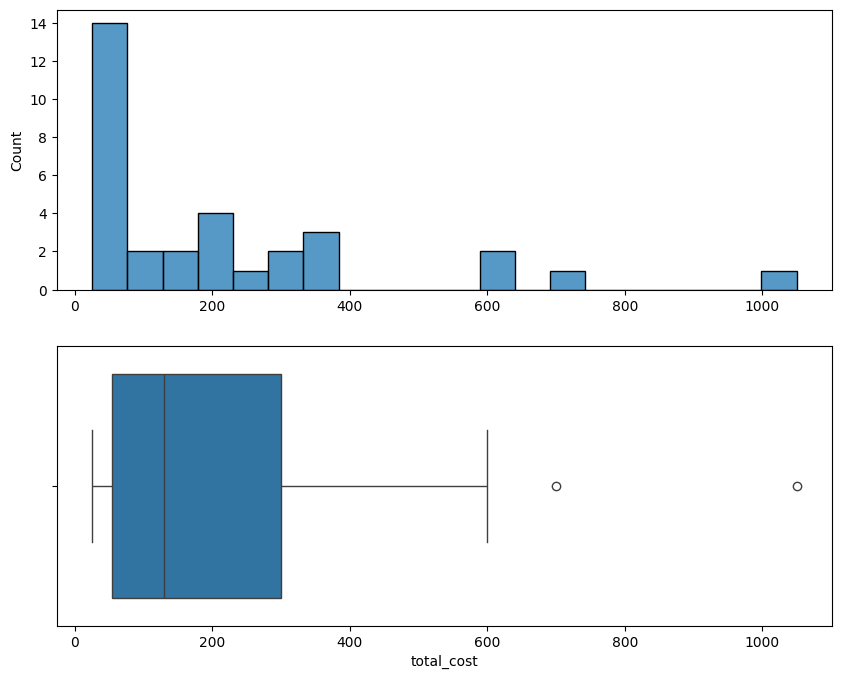

In [39]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

#histograma y boxplot para 'total_cost'
sns.histplot(ax=axis[0], data=dataset, x="total_cost", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="total_cost")

Reinterpretanto el gráfico de costes, este de costes totales vuelve a reflejar la mayor presencia de los electrodomésticos, productos del hogar y su barato coste de producción/venta. Este tipo de productos con un adecuado posicionamiento tendría mucho éxito en las ventas y dejaría un margen de benificio mucho más fácil de obtener que otros productos mucho más caros como la electrónica.

## Análisis Multivariante

- Análisis numérico-numérico

Se analizarán a pares las variables numéricas siempre con "units_sold" ya que es la variable que se trata de comprender en relación a las demás y el objetivo de este estudio.

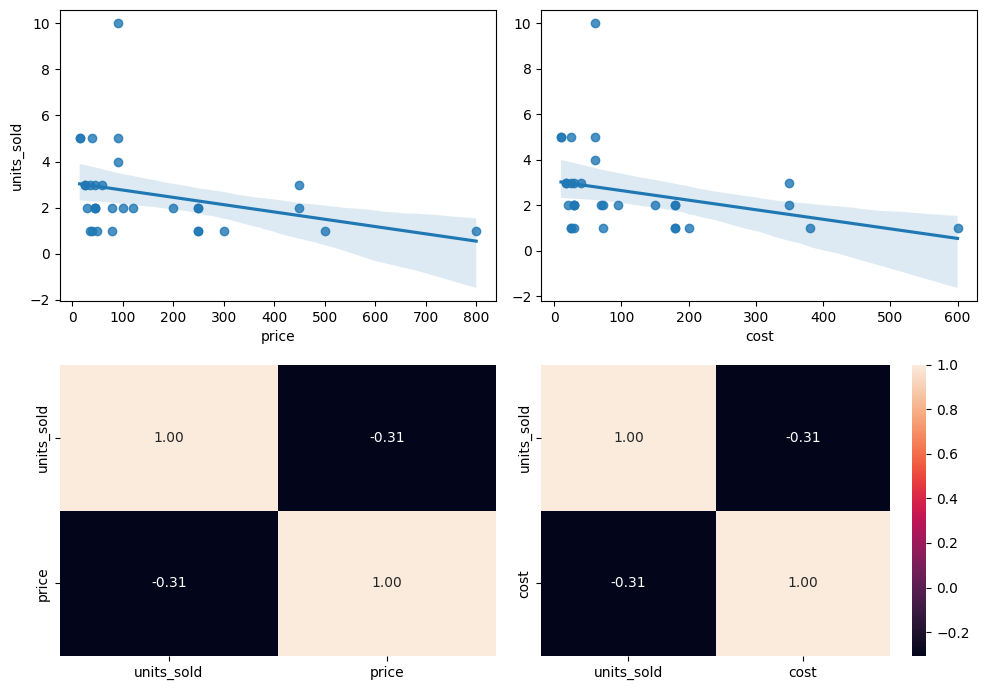

In [40]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

#diagrama de dispersión múltiple y diagrama de caja para "price"/"units_sold" y "cost"/"units_sold"

sns.regplot(ax = axis[0, 0], data = dataset, x = "price", y = "units_sold")
sns.heatmap(dataset[["units_sold", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset, x = "cost", y = "units_sold").set(ylabel=None)
sns.heatmap(dataset[["units_sold", "cost"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

#ajustar el layout
plt.tight_layout()

#mostrar el plot
plt.show()

Se observa que hay una relación negativa exactamente igual en el coste y el precio en relación a las unidades totales vendidas. Precios más altos pueden hacer pensarse al cliente dos veces si está preparado para realizar esa inversión en un producto como una cámara reflex (800 euros). Los productos más vendidos se encuentran por debajo de los 100 euros.

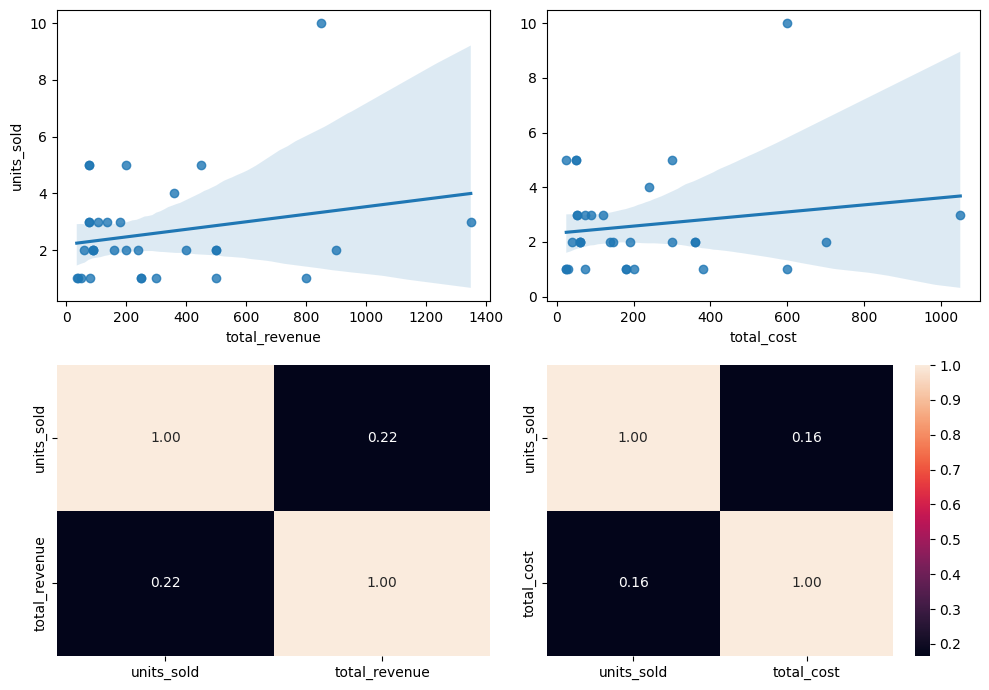

In [41]:
#configuración de los gráficos
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

#diagrama de dispersión múltiple y diagrama de caja para "total_revenue"/"units_sold" y "total_cost"/"units_sold"

sns.regplot(ax = axis[0, 0], data = dataset, x = "total_revenue", y = "units_sold")
sns.heatmap(dataset[["units_sold", "total_revenue"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset, x = "total_cost", y = "units_sold").set(ylabel=None)
sns.heatmap(dataset[["units_sold", "total_cost"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

#ajustar el layout
plt.tight_layout()

#mostrar el plot
plt.show()

Estos gráficos reflejan la correlación positiva y lógica de que a mayor productos vendidos mayores serán los beneficios totales, pero también lo serán el de los costes totales. Además se observa cierto comportamiento conservador en la mayoría de las tiendas que intentan mantener los costes totales por debajo de los 400 euros, intentando la mayor parte de estas estar por debajo de los 100 euros totales de costes por todas los productos vendidos.

- Análisis categórico-categórico

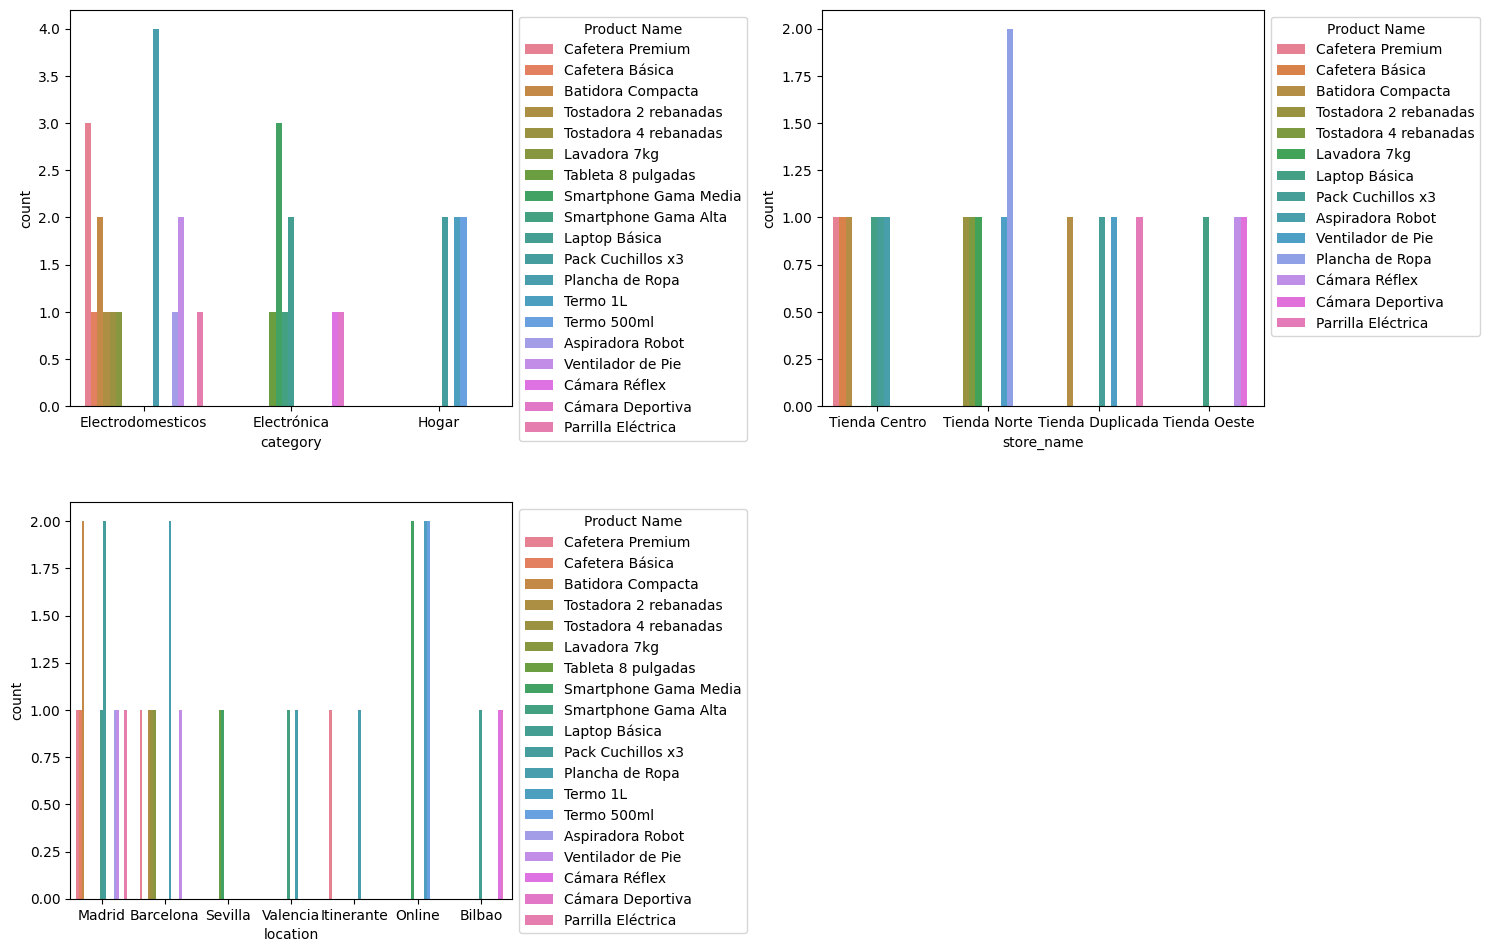

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#contar las 4 tiendas más frecuentes
top_stores = dataset['store_name'].value_counts().nlargest(4).index

#filtrar el dataset para incluir solo las 4 tiendas más frecuentes
filtered_dataset = dataset[dataset['store_name'].isin(top_stores)]

#configuración de los gráficos
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

#primer gráfico: "category"
sns.countplot(ax=axis[0, 0], data=dataset, x="category", hue="product_name")
axis[0, 0].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

#segundo gráfico: solo las 4 tiendas más frecuentes
sns.countplot(ax=axis[0, 1], data=filtered_dataset, x="store_name", hue="product_name")
axis[0, 1].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

#tercer gráfico: "location"
sns.countplot(ax=axis[1, 0], data=dataset, x="location", hue="product_name")
axis[1, 0].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

#ajustar el layout
plt.tight_layout()

#eliminar el eje vacío
fig.delaxes(axis[1, 1])

#mostrar la figura
plt.show()


"Category": Tal y como se dedujo anteriormente los productos más abundantes son los relacionados con Electromésticos. Sin duda por su facilidad de venta o mejor rango de beneficio.

"store_name": la "Tienda Centro" lidera en primera posición con el mayor contenido de productos y con presencia en todas las categorías de productos.

"location": fuera de la lógica de que en Madrid y Barcelona haya en general más y más tipos de productos, desctaca la localización "online". Con la venta de termos y smartphones de gama media ha conseguido una buena presencia en comparación con otras localidades de gran tamaño como Sevilla o Valencia. Sin duda una opción muy rentable si es que hay un buen sorpote detrás de infraestructura web, marketing y presencia en RRSS.

- Análisis numérico-categórico

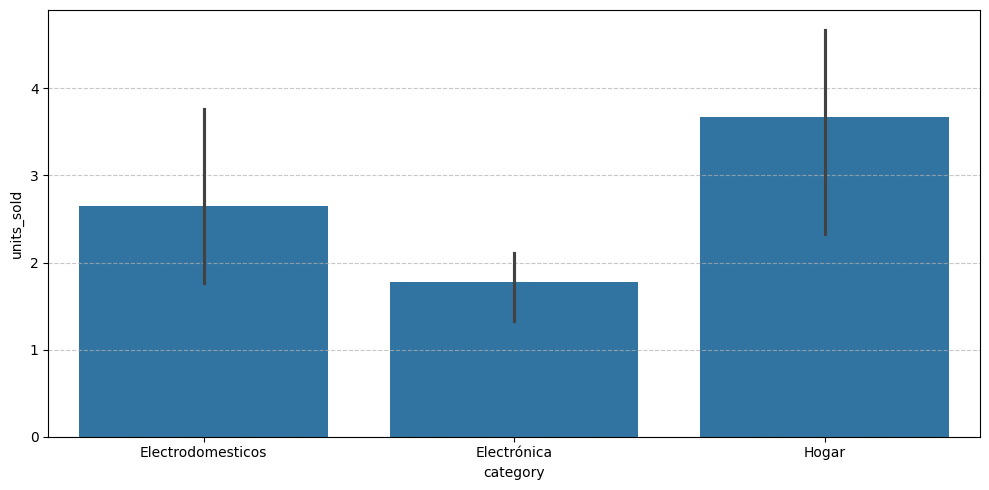

In [ ]:
#configuración del gráfico
fig, axis = plt.subplots(figsize = (10, 5))

#diagrama de barras relacionando categorías con unidades vendidas
sns.barplot(data = dataset, x = "category", y = "units_sold")
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

Se vuelve a apreciar que los bajos precios se resumen en una mayor cantidad de artilugios vendidos. Como se puede observar los productos del hogar lideran claramente la cantidad de unidades vendidas en la mayoría de las tiendas.

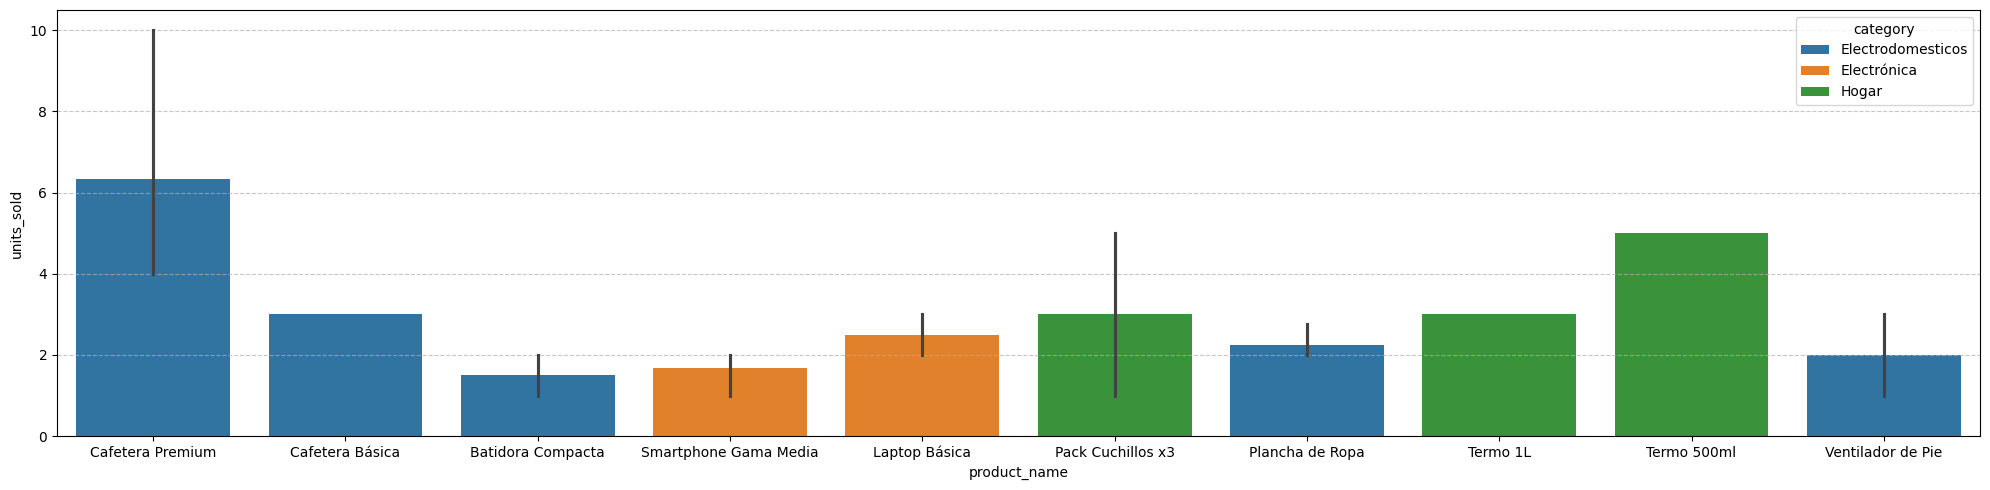

In [ ]:
#configuración de los gráficos
fig, axis = plt.subplots(figsize = (20, 5))

#contar los 10 productos más frecuentes
top_products = dataset['product_name'].value_counts().nlargest(10).index

#filtrar el dataset para incluir solo los 10 productos más frecuentes
filtered_dataset = dataset[dataset['product_name'].isin(top_products)]

sns.barplot(data = filtered_dataset, x = "product_name", y = "units_sold", hue = "category")
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

Diviendo el comentario del gráfico por categorías, el producto más vendido no solo de su categoría si no de todas las demás es la cafetera premium. Posiblemente el toque casero de una cafetera con unos detalles técnicos y estéticos la hagan muy atractiva. El laptop básico también proporciona una buena cantidad de ventas dentro de la categoría de Electrónica, incluso por encima de algunos electrodomésticos. Por último se observa que los termos de 500 ml y de 1L son buenos productos para la venta dentro de la categoría de productos para el hogar.

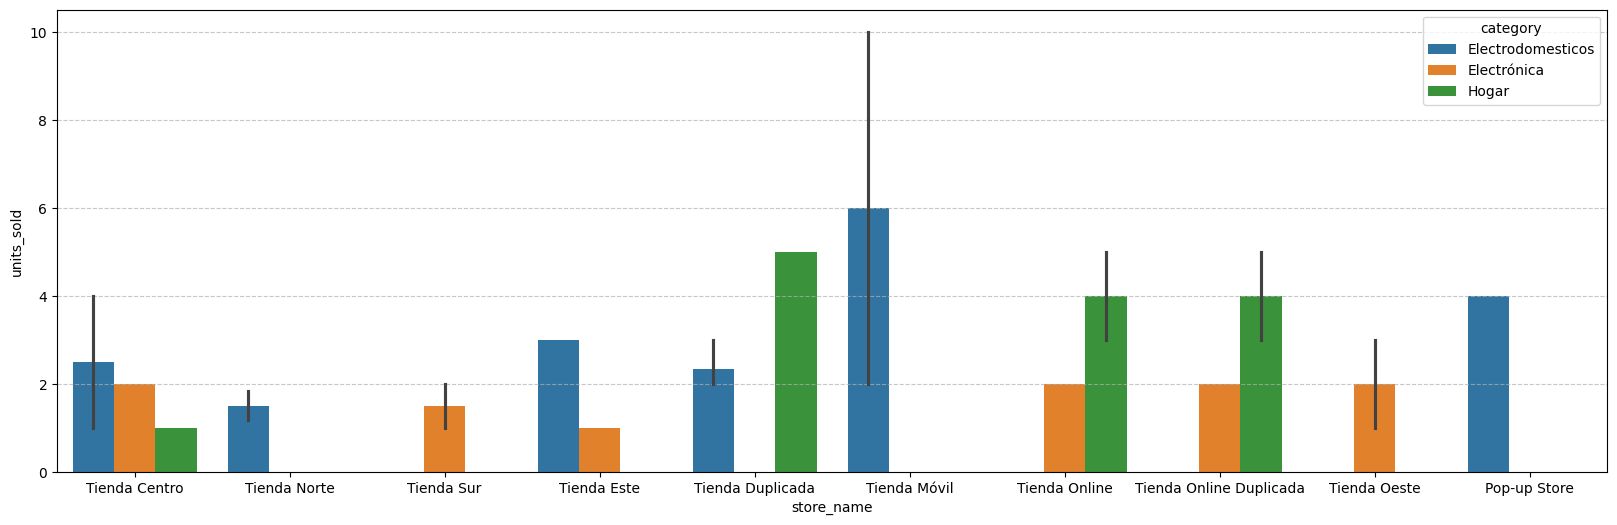

In [ ]:
#utilizamos un dataset que filtra las tiendas en un top 11

#contar las 11 tiendas más frecuentes
top_stores = dataset['store_name'].value_counts().nlargest(11).index

#filtrar el dataset para incluir solo las 11 tiendas más frecuentes
filtered_dataset = dataset[dataset['store_name'].isin(top_stores)]

plt.figure(figsize=(20, 6))
sns.barplot(data = filtered_dataset, x = "store_name", y = "units_sold", hue = "category")
plt.grid(axis='y', linestyle='--', alpha=0.7)



Aquí se puede observar cómo la tienda móvil lidera en cuestión de ventas totales de una categoría de producto, tal vez por especialización de productos o por el carácter itinerante de la propia tienda que puede buscar el lugar y momento propicio para favorecer las ventas. 

Resaltan también las tiendas online, capaces vender dos categorías muy diferentes(electrónica y hogar). Hoy en día por la presencia de la telefonía móvil y los pagos por transferencia y el aumento de la seguridad de estos son una gran opción para tener un comercio. 

A continnuación para una mejor entendimiento, el número y nombres de las tiendas en cada localización:

Madrid, dos tiendas; Tienda Centro y Tienda Duplicada.

Barcelona, dos tiendas; Tienda Norte	y Pop-up Store.

Sevilla, una tienda; Tienda Sur.

Valencia, una tienda; Tienda Este.

Bilbao, una tienda; Tienda Oeste.

Un total de dos tiendas tiene un formato online; Tienda Online y Tienda Online Duplicada.

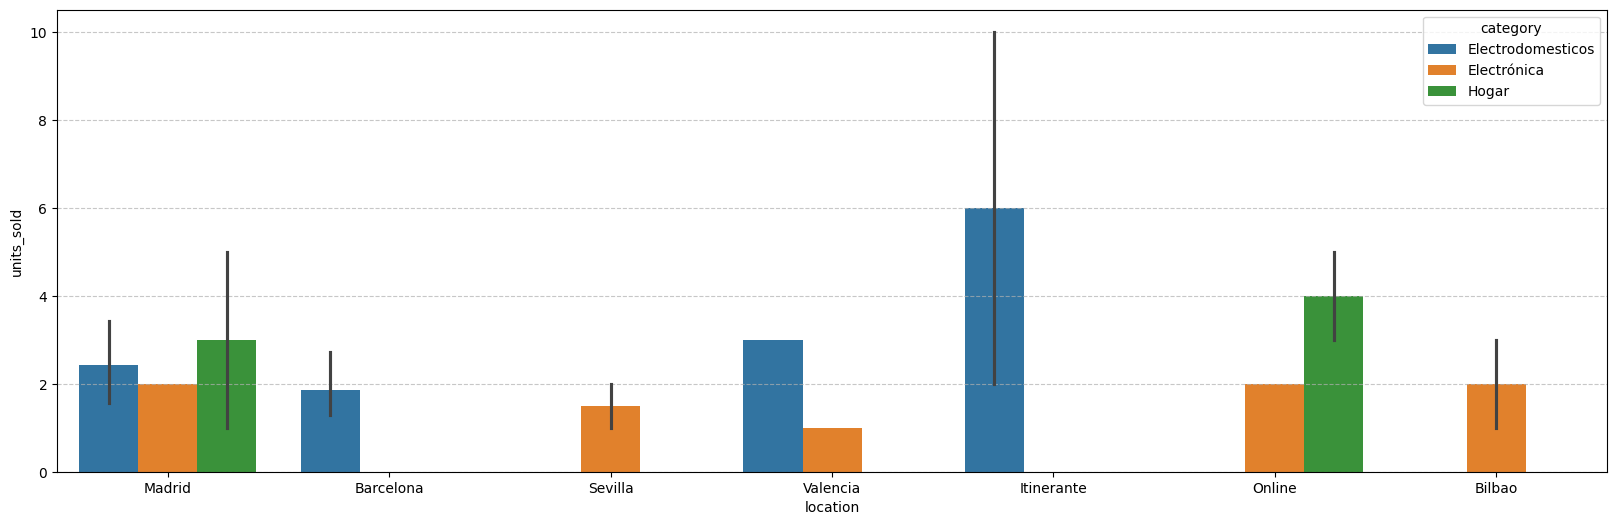

In [47]:
plt.figure(figsize=(20, 6))
sns.barplot(data = filtered_dataset, x = "location", y = "units_sold", hue = "category")
plt.grid(axis='y', linestyle='--', alpha=0.7)


Madrid por su superioridad en tiendas destaca por tener una mayor disponibilidad de productos de diferentes categorías, no obstante, las tiendas itinerantes bien por su especialización en una categoría o bien por buscar y el sitio y momento adecuados, consigue una buena cantidad de ventas de productos.

## Análisis temporal

Ahora, de una manera más específica analizaremos la fecha del lanzamiento del producto con la fecha real de venta del producto.

In [49]:
#asegurarnos de que las columnas de fecha estén en formato datetime
dataset['launch_date'] = pd.to_datetime(dataset['launch_date'])
dataset['sale_date'] = pd.to_datetime(dataset['sale_date'])
dataset['opening_date'] = pd.to_datetime(dataset['opening_date'])

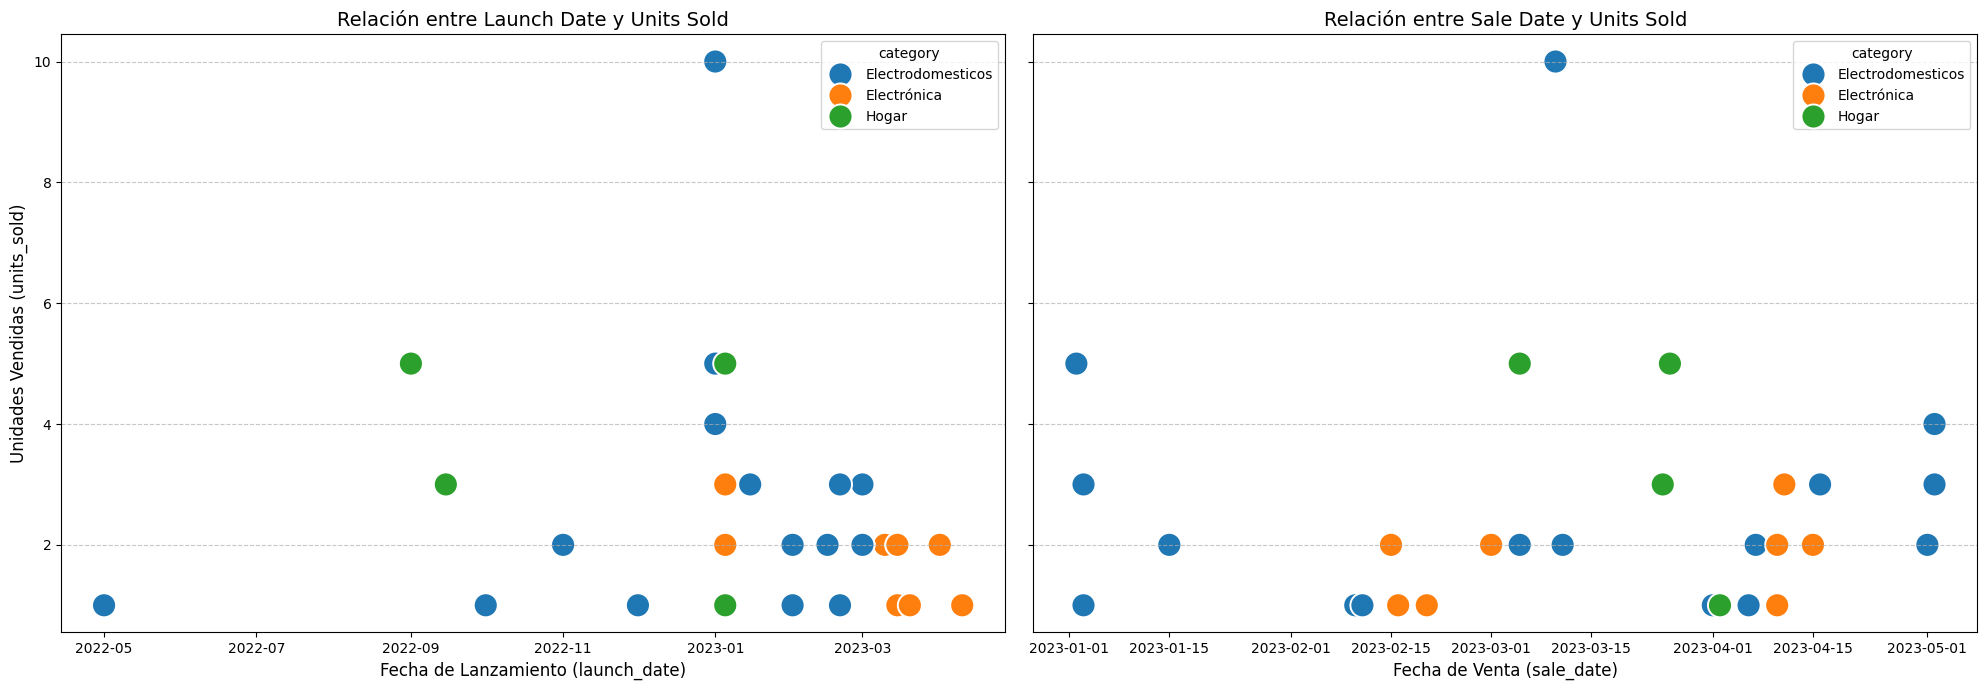

In [ ]:

#configurar la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)  # 2 filas, 1 columna

#gráfico para launch_date
sns.scatterplot(data=dataset, x='launch_date', y='units_sold', hue="category", s=300, ax=axes[0])

axes[0].set_title('Relación entre Launch Date y Units Sold', fontsize=14)
axes[0].set_xlabel('Fecha de Lanzamiento (launch_date)', fontsize=12)
axes[0].set_ylabel('Unidades Vendidas (units_sold)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

#gráfico para sale_date
sns.scatterplot(data=dataset, x='sale_date', y='units_sold', hue="category", s=300, ax=axes[1])

axes[1].set_title('Relación entre Sale Date y Units Sold', fontsize=14)
axes[1].set_xlabel('Fecha de Venta (sale_date)', fontsize=12)
axes[1].set_ylabel('Unidades Vendidas (units_sold)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

#ajustar el diseño
plt.tight_layout()
plt.show()


Los productos salen en su mayoría en enero para aprovechar las compras de navidad, pero la gran mayoría de ellos no acaban por venderse hasta pasados al menos dos meses. Esto tal ve sugiera que los productos deberían salir a la venta antes de estas fechas para que los consumidores al menos sepan de su existencia. También podría deberse a una mala planificación de marketing en relación al producto. También es posible que las ventas en su mayoría vayan dirigidos a otro tipo de productos de diferente categoría.

Destacar que los electrodomésticos son los únicos que se vendieron en los meses navideños



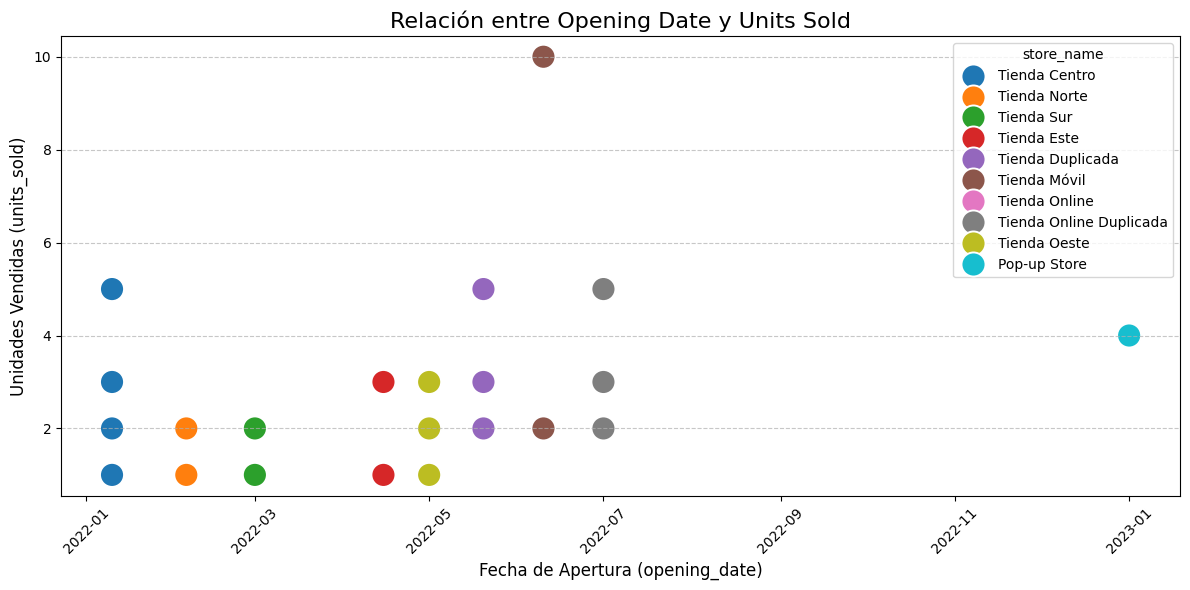

In [ ]:
#contar las 10 tiendas más frecuentes
top_stores = dataset['store_name'].value_counts().nlargest(10).index

#filtrar el dataset para incluir solo las 10 tiendas más frecuentes
filtered_dataset = dataset[dataset['store_name'].isin(top_stores)]

#configurar del gráfico
plt.figure(figsize=(12, 6))

#gráfico de dispersión en relación a la fecha de aperturas de las tiendas y las unidades vendidas
sns.scatterplot(data=filtered_dataset, x='opening_date', y='units_sold', hue="store_name", s=300)

#configurar los títulos y etiquetas
plt.title('Relación entre Opening Date y Units Sold', fontsize=16)
plt.xlabel('Fecha de Apertura (opening_date)', fontsize=12)
plt.ylabel('Unidades Vendidas (units_sold)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Con la tienda móvil como única referencia ante un mayor volumen de ventas, parece ser que en general la fecha de apertura de las tiendas no tenga demasiada relación con la cantidad de unidades vendidas. Si bien es cierto que todas las tiendas prefieren abrir en los primeros meses del año.

In [53]:
from sklearn.preprocessing import LabelEncoder

#utilizamos el LabelEncoder ya que las variables categóricas aquí descritas 
# no tienen un orden lógico que pueda afectar al entrenamiento del modelo

dataset_encoded = dataset.copy()

encoding = LabelEncoder()

variables_categoricas = ['category','location',]

for each in variables_categoricas:
    dataset_encoded[each] = encoding.fit_transform(dataset_encoded[each])


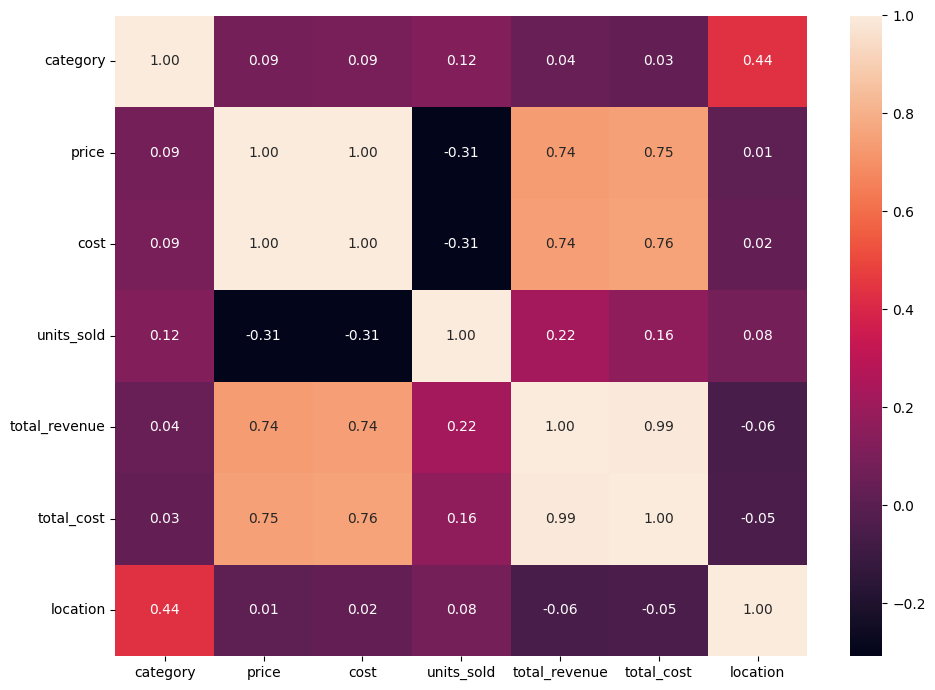

In [ ]:
fig, axis = plt.subplots(figsize = (10, 7))

#mapa de calor para observar las relaciones porcentuales con la variable objetivo "units_sold"
sns.heatmap(dataset_encoded[['category', 'price', 'cost', 'units_sold',
       'total_revenue', 'total_cost', 'location']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Conclusiones acerca de la relaciones hayadas: 

- A mayor beneficio, mayores unidades vendidas (22% de relación positiva), sin duda "total_revenue" es la variable que más afecta a la variable objetivo de forma postiva.

- La localización no parece tener demasiada relación con la cantidad de productos vendidos.

- El coste y precio, a mayores son, menores son los productos vendidos (31% de relación positiva)

# Conclusiones directas acerca del proyecto

Un proyecto muy esclarecedor acerca de como se deben enfocar las ventas. La elección del producto es clave, así mismo como tener un entorno que favorezca a la venta. Esto puede ser abriendo una tienda en una ciudad con mucha población como Madrid, lo que estadísticamente te proporcionará mayor número de posibles clientes y ventas cerradas.

Por otro lado sería muy interesante tener una mayor cantidad de datos en general para poder observar mayores relaciones entre sí y mayor cantidad de tipología de productos para observar su relación con las cantidades totales vendidas y el potencial beneficio.

Se ha observado que en lo que concierne a la categorías de elecctrodomésticos, productos de hogar y electrónica no tienen una gran presencia en épocas navideñas, una de las más consumistas del año.

Por último la elección de los productos, o mejor dicho del precio y coste de los productos podría ser determinante a la hora de ser rentable en el tiempo. Se ha evidenciado en este análisis que los productos por debajo de los 100 euros tienen un mayor volumen de ventas respecto a otros productos más caros.

Los productos más caros por otra parte, aunque puedan tener grandes precios también conllevan grandes costes, por lo que el estudio del posible volumen de ventas de estos productos en relación al resto de variables aquí tratadas es determinante para asegurar la supervivencia del negocio, sea donde sea que esté, presencial u online.

Por último estos productos al mismo tiempo que muy caros, son de gran calidad. Lo que podría suponer que solamente profesionales que necesiten realmente estos productos (ej: laptop de gama alta o cámara reflex) podrían sacarle partido. 

Todo este análisis deja preveer que herramientas como el Machine Learninig aplicado al Business Intelligence podrían ser claves a la hora de ayudar en la elección de los productos correctos para determinadas tiendas con localizaciones concretas.


# Machine Learning

Se procederá a hacer un modelo de aprendizaje automático. Las expectativas son pocas y malas, ya que el tamaño total de los datos es muy pobre. No obstante, gracias a todo el análisis previo se pueden entender muchas de las relaciones que pueden provocar el éxito de un mayor número de ventas, que es al final lo que todo empresario/vendedor busca.

In [56]:
#se eliminan ciertas variables

dataset_encoded = dataset_encoded.drop(columns=["product_name", "launch_date", "sale_date", "store_name", "opening_date"])


Estas variables se despejan del conjunto de datos con el que se entrenará al modelo, ya que previamente han dejado claro que no tienen una relación fuerte con la variable objetivo.

In [ ]:
#importación de las bibliotecas necesarias

from sklearn.linear_model import LinearRegression #modelo a entrenar
from sklearn.model_selection import train_test_split #división de datos en train y test
from sklearn.preprocessing import StandardScaler #estandarización para facilutar a comparación de coeficientes y mejorar la convergencia del modelo


x = dataset_encoded[['category', 'price', 'cost', 'total_revenue', 'total_cost', 'location']] #división de train y test
y = dataset_encoded['units_sold']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)


scaler = StandardScaler()                              #estandarización del conjunto de datos de entrenamiento
x_train_scaled = scaler.fit_transform(x_train)

model = LinearRegression()                    #entrenamiento del modelo
model.fit(x_train_scaled, y_train)

LinearRegression()

In [58]:
x_test_scaled = scaler.transform(x_test)
y_pred = model.predict(x_test_scaled)
y_pred


array([2.52243596, 2.2241626 , 2.25996645, 2.42618575, 0.48700136,
       2.55852497, 2.36998891])

In [59]:
from sklearn.metrics import mean_squared_error, r2_score


print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 1.2198567246869756
Coeficiente de determinación: 0.12098559544614984


In [60]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(LinearRegression(), hyperparams, scoring="neg_mean_squared_error", cv=5)

# Ajustar el modelo a los datos escalados
grid.fit(x_train_scaled, y_train)

# Imprimir los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Realizar predicciones con el mejor modelo
y_pred_best = grid.predict(x_test_scaled)

# Evaluar el mejor modelo
print(f"Error cuadrático medio del mejor modelo: {mean_squared_error(y_test, y_pred_best)}")
print(f"Coeficiente de determinación del mejor modelo: {r2_score(y_test, y_pred_best)}")

Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Error cuadrático medio del mejor modelo: 1.2198567246869756
Coeficiente de determinación del mejor modelo: 0.12098559544614984
